# Diabetes Prediction with ANN 

In [1]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Splitting Data

In [3]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Pytorch Libraries

In [5]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

### Creating Tensors

In [6]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [7]:
df.shape

(768, 9)

### Creating Model with Pytorch

In [10]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, output_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, output_features)
    
    def forward(self, x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

### Initialize ANN Model

In [11]:
torch.manual_seed(20)
model = ANN_Model()

In [12]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

### Backward Propogation

In [13]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
epochs = 500 
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.457212209701538
Epoch number: 11 and the loss : 0.8019211888313293
Epoch number: 21 and the loss : 0.6090322732925415
Epoch number: 31 and the loss : 0.5917770862579346
Epoch number: 41 and the loss : 0.5679708123207092
Epoch number: 51 and the loss : 0.5529040098190308
Epoch number: 61 and the loss : 0.5410097241401672
Epoch number: 71 and the loss : 0.5310391783714294
Epoch number: 81 and the loss : 0.522036075592041
Epoch number: 91 and the loss : 0.5135970711708069
Epoch number: 101 and the loss : 0.5061254501342773
Epoch number: 111 and the loss : 0.49834102392196655
Epoch number: 121 and the loss : 0.49605488777160645
Epoch number: 131 and the loss : 0.4828638434410095
Epoch number: 141 and the loss : 0.4755900204181671
Epoch number: 151 and the loss : 0.4819865822792053
Epoch number: 161 and the loss : 0.48064669966697693
Epoch number: 171 and the loss : 0.4706901013851166
Epoch number: 181 and the loss : 0.4590846300125122
Epoch number: 191 and 

### Plot the loss function

In [15]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Epoch')

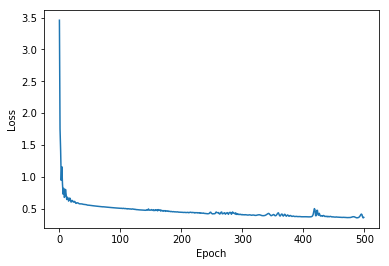

In [16]:
plt.plot(range(epochs), final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

### Prediction In X_test data

In [17]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[94, 13],
       [21, 26]])

Text(69.0, 0.5, 'Predicted Values')

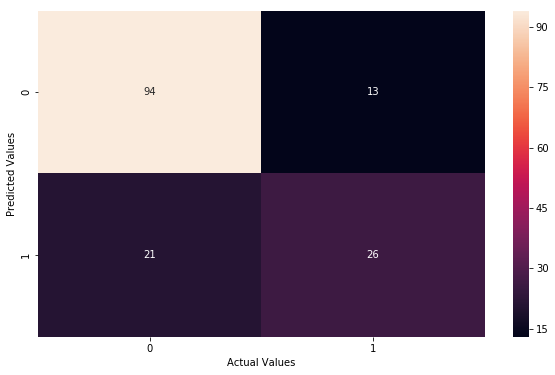

In [20]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [21]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7792207792207793

### Save the model

In [22]:
torch.save(model,'diabetes.pt')

/Users/vishwasmore/opt/anaconda3/envs/envpytorch/lib/python3.7/site-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type ANN_Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


### Save And Load the model

In [23]:
model=torch.load('diabetes.pt')

In [24]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

### New Data

In [26]:
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [27]:
new_data=torch.tensor(lst1)

In [28]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.4724, 1.5227])
1
